**PHAN LÊ ANH THƯ** | thuleanhphan@gmail.com


---

Data source: https://www.kaggle.com/carrie1/ecommerce-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set theme for better visualization:
sns.set_theme(rc={'figure.figsize': (14, 8)}) # .set is an alias of .set_theme()

In [2]:
# Load data
raw_data = pd.read_csv('data.csv', encoding = 'ISO-8859-1') #Encode for some special characters
df = raw_data

**Describe dataset**

In [3]:
# Describe
print(df.shape)
df.describe()

(541909, 8)


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


In [5]:
# Head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Tail
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
df.loc[df['StockCode'] == '22613']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
10567,537237,22613,PACK OF 20 SPACEBOY NAPKINS,1,12/6/2010 9:58,1.66,NaN,United Kingdom
14853,537623,22613,PACK OF 20 SPACEBOY NAPKINS,3,12/7/2010 14:31,0.85,15858.0,United Kingdom
18129,537799,22613,PACK OF 20 SPACEBOY NAPKINS,6,12/8/2010 13:07,0.85,15916.0,United Kingdom
29484,538799,22613,PACK OF 20 SPACEBOY NAPKINS,1,12/14/2010 11:48,0.85,15039.0,United Kingdom
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,12/20/2010 10:09,0.85,14646.0,Netherlands
...,...,...,...,...,...,...,...,...
522473,580399,22613,PACK OF 20 SPACEBOY NAPKINS,4,12/4/2011 11:45,0.85,13471.0,United Kingdom
522958,580482,22613,PACK OF 20 SPACEBOY NAPKINS,1,12/4/2011 12:44,0.85,16033.0,United Kingdom
532367,580983,22613,PACK OF 20 SPACEBOY NAPKINS,1,12/6/2011 16:26,1.63,NaN,United Kingdom
532925,581001,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/7/2011 8:07,0.85,12583.0,France


- Mỗi hàng là dữ liệu của một *Sản phẩm trong một đơn hàng*, có 541909 hàng.
- Có 8 cột.
1. InvoiceNo: Mã số hóa đơn, thể hiện đơn hàng mà sản phẩm đó thuộc
2. StockCode: Mã số tồn kho, là định danh sản phẩm (độc nhất cho mỗi mẫu sản phẩm)
3. Description: Mô tả sản phẩm 
4. Quantity: Số lượng mua
5. InvoiceDate: Ngày mua
6. UnitPrice: Đơn giá
7. CustomerID: Mã số khách hàng, định danh khách hàng
8. Country: quốc gia

In [9]:
# Which are categorical variables?

cat_vars = df.select_dtypes(include='object').columns
cat_vars

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [10]:
df.describe(include = 'object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [11]:
# Which are numerical variables?

num_vars = df.select_dtypes(include='number').columns
num_vars

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [12]:
df.describe(include = 'number')

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Cleaning

In [13]:
# Rename columns
df.rename(index=str, columns={'InvoiceNo': 'invoice_no',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'customer_id',
                              'Country' : 'country'}, inplace=True)

In [14]:
# Drop rows which have Quantity <0:
df = df[df.quantity > 0]

In [15]:
df['description'] = df.description.str.lower()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_42968/772584232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df.description.str.lower()


### ***Data types***

In [16]:
df.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

### ***Handle missing values***

In [18]:
import missingno as msno

In [19]:
# Check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

customer_id     133361
description        592
invoice_no           0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [20]:
# Rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,12/1/2010 14:32,1.66,NaN,United Kingdom


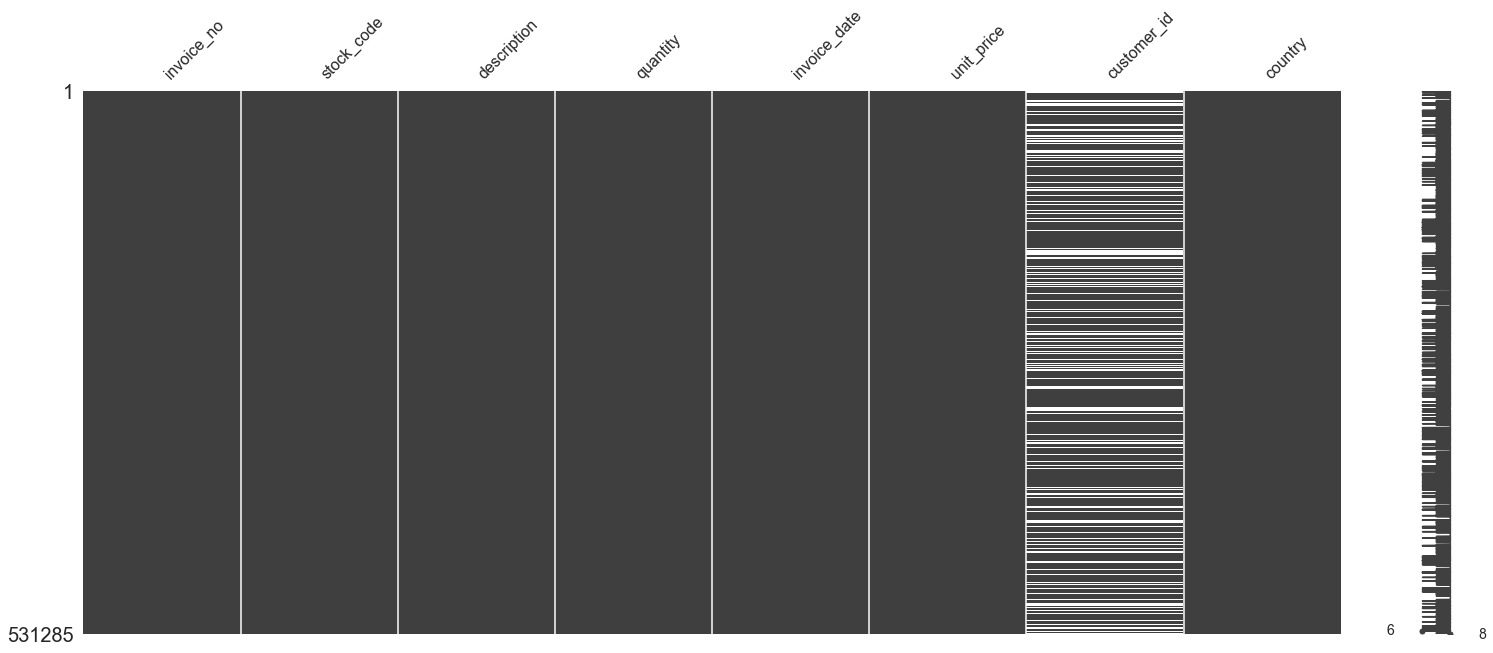

In [21]:
# Visualize missingness matrix
msno.matrix(df)
plt.show()

Chỉ có 2 cột CustomerID và Description là có missing value. 

Description là dạng chữ, không dùng tính toán -> Xử lí bằng cách thay giá trị NaN bằng "Unknown"

Customer_id ở dạng số (tuy mang ý nghĩa định tính), có thể dùng để đếm,... về sau -> Thay bằng 00000 

In [22]:
# Fill na with "Unknown" value
df["customer_id"].fillna(value=00000, inplace = True)
df["description"].fillna(value="Unknown", inplace = True)

# Check again
df.isnull().sum().sort_values(ascending=False)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [23]:
# Customer_id type
df['customer_id'] = df['customer_id'].astype('int64')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_42968/541758130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_id'] = df['customer_id'].astype('int64')


### ***Process date value***

In [24]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y %H:%M')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_42968/2855362600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y %H:%M')


In [25]:
# Drill down invoice_date into year, month, day of week, hour:

df.insert(loc=2, column='year', value=df.invoice_date.dt.year)
df.insert(loc=3, column='month', value=df.invoice_date.dt.month)
df.insert(loc=4, column='day', value=(df.invoice_date.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.invoice_date.dt.hour)

In [26]:
df.sample(5)

,invoice_no,stock_code,year,month,day,hour,description,quantity,invoice_date,unit_price,customer_id,country
438458,574321,71477,2011,11,4,19,colour glass. star t-light holder,2,2011-11-03 19:28:00,3.95,16016,United Kingdom
379346,569688,21883,2011,10,3,14,stars gift tape,1,2011-10-05 14:55:00,0.65,15048,United Kingdom
122871,546888,79066K,2011,3,4,18,retro mod tray,1,2011-03-17 18:15:00,1.63,0,United Kingdom
115217,546111,22078,2011,3,3,12,ribbon reel lace design,1,2011-03-09 12:39:00,2.10,14165,United Kingdom
141033,548497,22488,2011,3,4,13,natural slate rectangle chalkboard,12,2011-03-31 13:43:00,1.65,13089,United Kingdom


### ***Add columns***

In [27]:
# Add columns of money spent
df['amount_spent'] = df['quantity'] * df['unit_price']

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_42968/2067688997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_spent'] = df['quantity'] * df['unit_price']


In [28]:
df.sample(10)

,invoice_no,stock_code,year,month,day,hour,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent
327257,565648,23065,2011,9,1,16,large deco jewellery stand,1,2011-09-05 16:22:00,12.50,18196,United Kingdom,12.50
248568,558861,23126,2011,7,1,12,feltcraft girl amelie kit,4,2011-07-04 12:19:00,4.95,13373,United Kingdom,19.80
263194,559948,23179,2011,7,4,10,clock magnet mum's kitchen,24,2011-07-14 10:41:00,2.89,12653,Israel,69.36
40954,539750,22139,2010,12,2,15,retrospot tea set ceramic 11 pc,1,2010-12-21 15:40:00,11.02,0,United Kingdom,11.02
130549,547497,84988,2011,3,3,12,set of 72 pink heart paper doilies,3,2011-03-23 12:15:00,1.45,14461,United Kingdom,4.35
469114,576581,84879,2011,11,2,14,assorted colour bird ornament,16,2011-11-15 14:15:00,1.69,15955,United Kingdom,27.04
272468,560772,23052,2011,7,3,16,recycled acapulco mat turquoise,2,2011-07-20 16:12:00,16.63,0,United Kingdom,33.26
475867,576923,23237,2011,11,4,10,set of 4 knick knack tins leaf,48,2011-11-17 10:52:00,3.75,12753,Japan,180.00
242457,558348,22348,2011,6,2,14,tea bag plate red retrospot,12,2011-06-28 14:50:00,0.85,17188,United Kingdom,10.20
368164,568949,23311,2011,9,4,15,vintage christmas stocking,2,2011-09-29 15:13:00,4.96,0,United Kingdom,9.92


---

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    531285 non-null  object        
 1   stock_code    531285 non-null  object        
 2   year          531285 non-null  int64         
 3   month         531285 non-null  int64         
 4   day           531285 non-null  int64         
 5   hour          531285 non-null  int64         
 6   description   531285 non-null  object        
 7   quantity      531285 non-null  int64         
 8   invoice_date  531285 non-null  datetime64[ns]
 9   unit_price    531285 non-null  float64       
 10  customer_id   531285 non-null  int64         
 11  country       531285 non-null  object        
 12  amount_spent  531285 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 46.6+ MB


## EDA

***Correlation***

<AxesSubplot:>

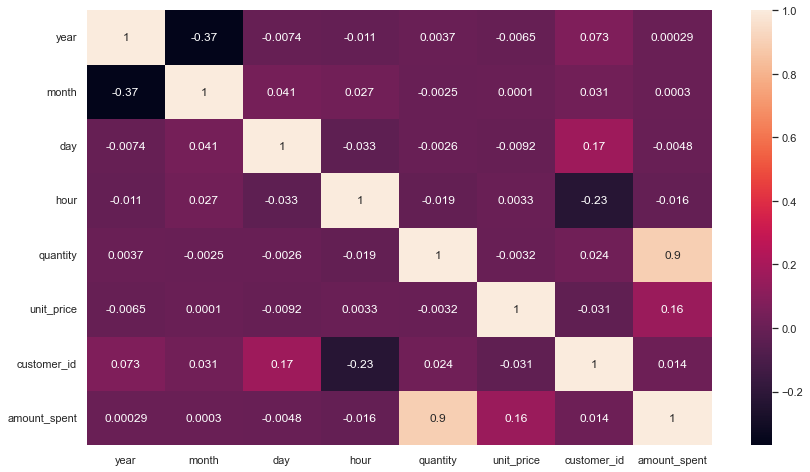

In [30]:
sns.heatmap(df.corr(), annot=True)

Quan sát ban đầu cho thấy không có quan hệ tương quan nào có correlation đáng chú ý.
* Tuy unit_price và quantity có correlation = 0.89 nhưng điều này không có gì đặc biệt vì quantity nằm trong công thức tính amount_spent

### Univariate analysis: Numbers of orders, unit price

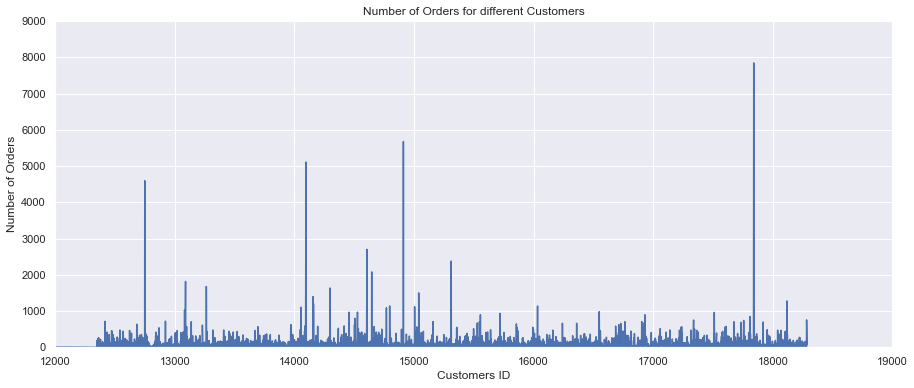

In [31]:
orders = df.groupby(by=['customer_id','country'], as_index=False)['invoice_no'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.customer_id, orders.invoice_no)
plt.xlim([12000, 19000])
plt.ylim([0, 9000])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

Có thể quan sát thấy một vài outliers (cột cao hơn hẳn phần còn lại của tập dữ liệu)

In [32]:
orders

,customer_id,country,invoice_no
0,0,Bahrain,1
1,0,EIRE,656
2,0,France,66
3,0,Hong Kong,284
4,0,Israel,47
...,...,...,...
4351,18280,United Kingdom,10
4352,18281,United Kingdom,7
4353,18282,United Kingdom,12
4354,18283,United Kingdom,756


In [33]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_no', ascending=False).head(6)

The TOP 5 customers with most number of orders...


,customer_id,country,invoice_no
7,0,United Kingdom,131941
4028,17841,United Kingdom,7847
1897,14911,EIRE,5677
1307,14096,United Kingdom,5111
343,12748,United Kingdom,4596
1679,14606,United Kingdom,2700


***Orders by country***

<AxesSubplot:ylabel='country'>

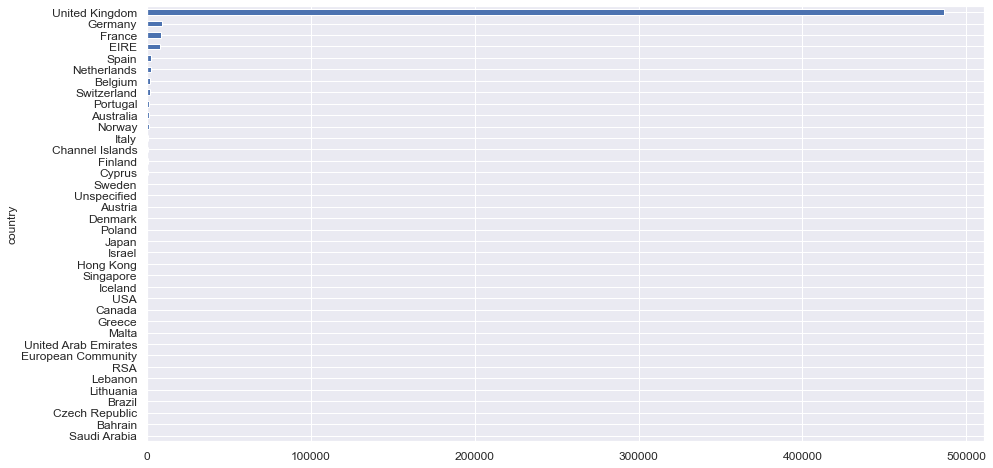

In [34]:
# Orders and money spent group by country
group_country_orders = df.groupby('country')['invoice_no'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)

Vì đây là tập dữ liệu chủ yếu ở UK nên group theo country cho số lượng đơn ở UK vượt trội, thử bỏ UK xem các nước ở ngoài UK như thế nào:

<AxesSubplot:ylabel='country'>

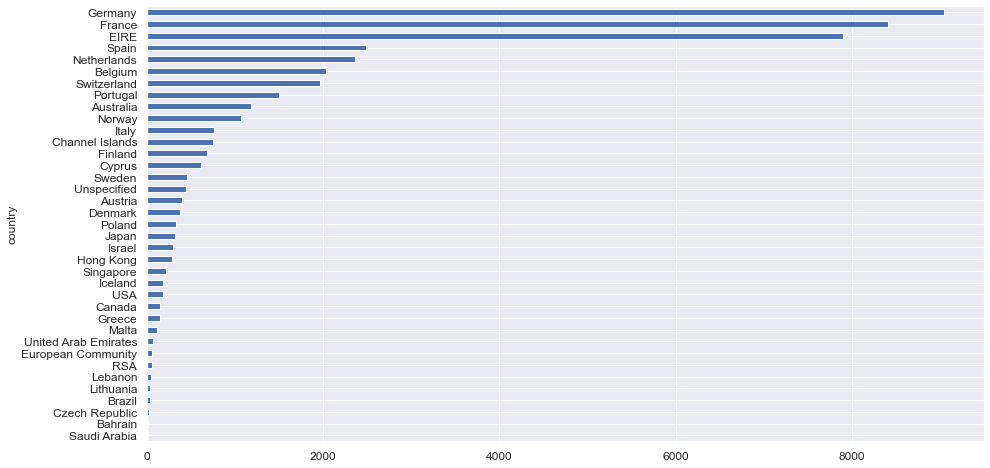

In [35]:
# Exclude UK:
group_country_orders_not_UK = df[df['country'] != 'United Kingdom'].groupby('country')['invoice_no'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country_orders_not_UK.plot(kind='barh', fontsize=12)

In [36]:
group_country_orders['United Kingdom']/group_country_orders.sum()

0.9153015801311913

Orders tại UK chiếm đến 91.43% dữ liệu -> Phân tích liên quan đến biến 'country' sẽ không thật sự ý nghĩa

***Orders by time***

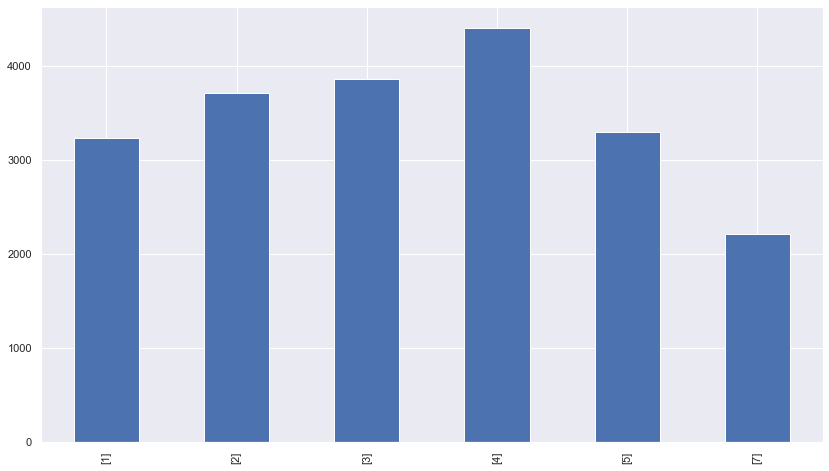

In [37]:
# Orders and money spent group by day of week
orders_by_days = df.groupby('invoice_no')['day'].unique().value_counts().sort_index()
orders_by_days.plot(kind = 'bar')

plt.show()

Không có dữ liệu mua hàng vào ngày thứ 7.

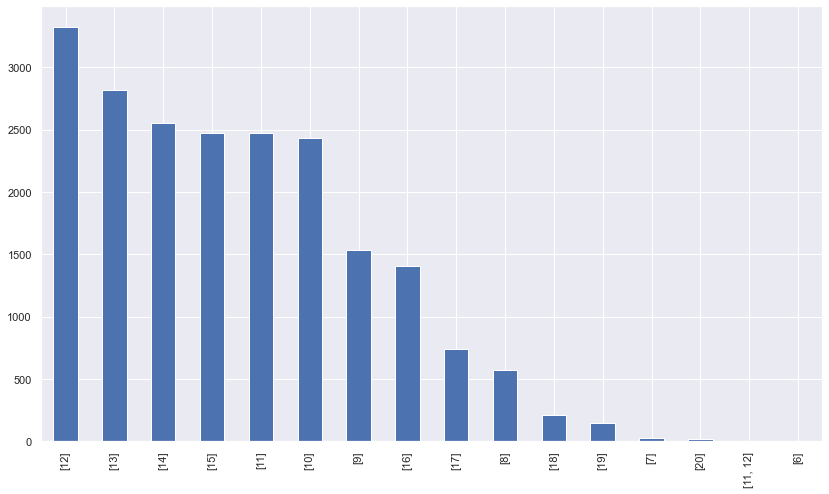

In [38]:
# Orders and group by hours

orders_by_hours= df.groupby('invoice_no')['hour'].unique().value_counts()
orders_by_hours.plot(kind = 'bar')

plt.show()

Bước đầu nhận thấy khoảng thời gian nhiều đơn hàng nhất là khoảng 10-15 giờ hàng ngày

***Unit Price***

In [39]:
df.unit_price.describe()

count    531285.000000
mean          3.857296
std          41.810047
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: unit_price, dtype: float64

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


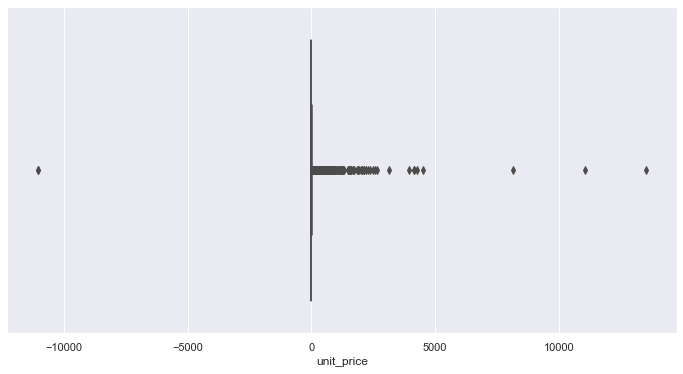

In [40]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df.unit_price)
plt.show()

Có giá trị = 0 -> Nhiều sản phẩm là miễn phí

Có giá trị <0, giá trị nằm xa so với phần còn lại của tập dữ liệu -> Outliers -> Loại bỏ

In [41]:
# Detect outliers
# Remove alcohol outliers using z-sore > 3

x = df['unit_price']
mu = x.mean()
sigma = x.std()
z_score = (x-mu)/sigma

df[abs(z_score) > 3].shape # How many outliers?

(681, 13)

In [42]:
outlier = df[abs(z_score) > 3]
df = df[abs(z_score) <= 3]

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


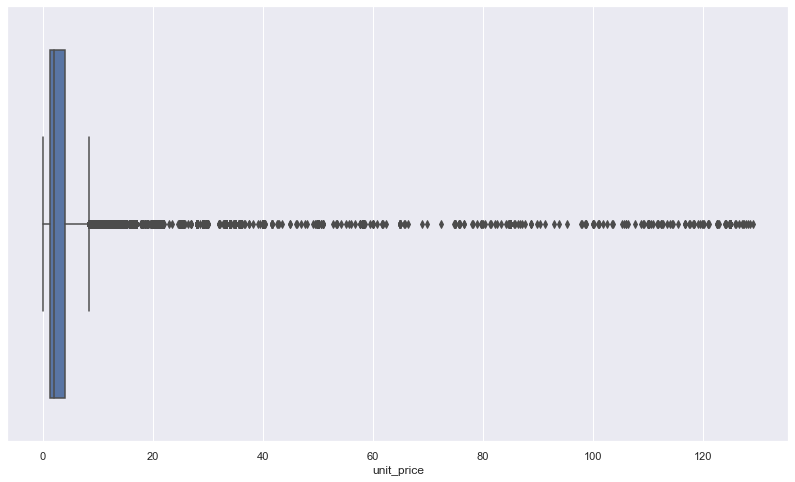

In [43]:
sns.boxplot(df.unit_price)
plt.show()

**HYPOTHESIS TESTING: GIÁ TRỊ TRUNG BÌNH CỦA CÁC ĐƠN HÀNG = GIÁ TRỊ ĐƠN HÀNG CỦA TẬP DỮ LIỆU**

<AxesSubplot:>

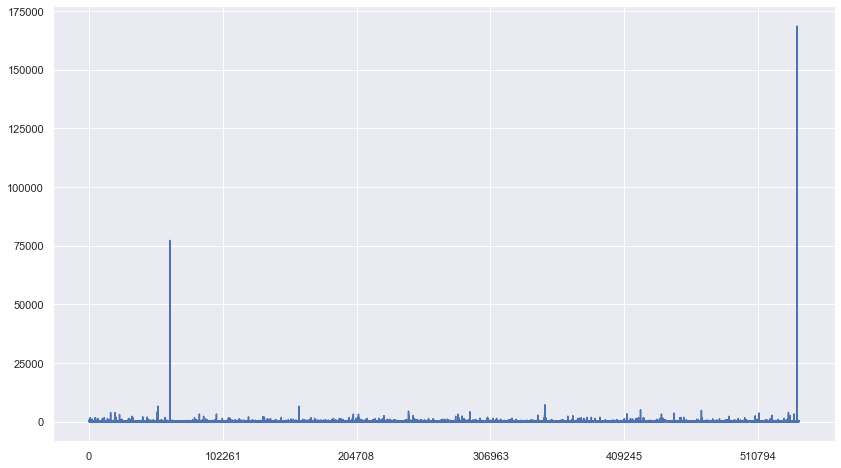

In [44]:
df['amount_spent'].plot()

Đầu tiên, loại bỏ outlier của biến amount_spent để đảm bảo các đơn hàng có giá trị lớn vượt trội không ảnh hưởng đến kết quả kiểm định

In [45]:
# Detect outliers
# Remove alcohol outliers using z-sore > 3

x = df['amount_spent']
mu = x.mean()
sigma = x.std()
z_score = (x-mu)/sigma


In [46]:
df[abs(z_score) > 3].shape 

(484, 13)

In [47]:
outlier = df[abs(z_score) > 3]
df_no_amount_spent_outlier = df[abs(z_score) <= 3]

In [48]:
outlier.describe()

,year,month,day,hour,quantity,unit_price,customer_id,amount_spent
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,2010.913223,7.938017,2.907025,13.202479,868.264463,4.836591,14511.477273,2047.094835
std,0.281799,3.205889,1.404530,2.891466,4986.864298,4.442859,5566.157381,8372.346433
min,2010.000000,1.000000,1.000000,7.000000,24.000000,0.210000,0.000000,809.760000
25%,2011.000000,6.000000,2.000000,11.000000,204.000000,2.287500,14156.000000,959.475000
50%,2011.000000,9.000000,3.000000,13.000000,365.000000,3.750000,16489.000000,1224.000000
75%,2011.000000,11.000000,4.000000,16.000000,631.750000,5.112500,17949.000000,1790.000000
max,2011.000000,12.000000,7.000000,20.000000,80995.000000,34.950000,18133.000000,168469.600000


In [49]:
df_no_amount_spent_outlier.describe()

,year,month,day,hour,quantity,unit_price,customer_id,amount_spent
count,530120.000000,530120.000000,530120.000000,530120.000000,530120.000000,530120.000000,530120.000000,530120.000000
mean,2010.921552,7.561296,3.436829,13.075298,9.884526,3.312485,11463.645007,17.584693
std,0.268876,3.508737,1.850419,2.437513,36.320750,4.222954,6789.780852,36.766781
min,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000
25%,2011.000000,5.000000,2.000000,11.000000,1.000000,1.250000,0.000000,3.750000
50%,2011.000000,8.000000,3.000000,13.000000,3.000000,2.080000,14382.000000,9.900000
75%,2011.000000,11.000000,5.000000,15.000000,10.000000,4.130000,16261.000000,17.700000
max,2011.000000,12.000000,7.000000,20.000000,12540.000000,129.080000,18287.000000,806.400000


**HYPOTHESIS TESTING: TRUNG BÌNH TỔNG THỂ GIÁ TRỊ MUA HÀNG BẰNG 18 (LÀM TRÒN GIÁ TRỊ TRUNG BÌNH CỦA TẬP DỮ LIỆU KHÔNG CHỨA OUTLIERS)**

Lí do chọn giá trị mua hàng để thực hiện kiểm định là vì nó có ý nghĩa trong việc tính toán, dự báo doanh thu. Bên cạnh đó, giá trị của hai biến quantity và unit_price tùy thuộc rất nhiều vào sản phẩm (Ví dụ: có những sản phẩm như máy giặt, tủ lạnh,... khách hàng không thể mua với số lượng lớn) -> chọn amount_price để có thông tin cân bằng hơn.

In [50]:
# pip install --upgrade --no-deps statsmodels

In [51]:
# Giả thuyết:
#      H0: Mu = 18
#      Ha: Mu khác 18
#      (kiểm định 2 bên)

from statsmodels.stats.weightstats import ztest as ztest

In [52]:
amount_spent = df_no_amount_spent_outlier['amount_spent']
ztest(amount_spent, value = 18, alternative='two-sided')

(-8.224337657959175, 1.9627243869010385e-16)

p = 1.96e-16 = 1.96 * 10^-16 <<< alpha = 0.05 => Reject H0

Kết luận: Không có bằng chứng thống kê cho thấy giá trị mua hàng tổng thể gần với giá trị mua hàng trong tập dữ liệu.

---

### Grouping to daypart
Nhóm dữ liệu theo các buổi trong ngày để tìm các pattern liên quan đến khoảng thời gian của một ngày. 

In [53]:
# Daypart accoring to Arbitron
df['daypart'] = df['hour'].apply(lambda value: ('morning' if value >=6 and value <=10 
                                                else 'midday' if value >10 and value <=15 
                                                else 'afternoon' if value>15 and value <=19 
                                                else 'night'))

df['daypart'] = pd.Categorical(df['daypart'], categories=['morning', 'midday', 'afternoon','night'])

In [54]:
df.head()

,invoice_no,stock_code,year,month,day,hour,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent,daypart
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,morning
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,morning
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,morning
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,morning
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,morning


In [55]:
subset_attr = ['invoice_no','customer_id','hour', 'quantity', 'unit_price', 'amount_spent']

morning = round(df[df['daypart'] == 'morning'][subset_attr].describe(), 2)
midday = round(df[df['daypart'] == 'midday'][subset_attr].describe(), 2)
afternoon = round(df[df['daypart'] == 'afternoon'][subset_attr].describe(), 2)
night = round(df[df['daypart'] == 'night'][subset_attr].describe(), 2)

pd.concat([morning, midday, afternoon, night], axis=1, 
          keys=['⛅ Morning', 
                '🌞 Midday', 
                '🔆 Afternoon',
                '🌛 Night'])

⛅ Morning                                                🌞 Midday  \
      customer_id      hour  quantity unit_price amount_spent customer_id   
count    90713.00  90713.00  90713.00   90713.00     90713.00   346953.00   
mean     11422.31      9.42     16.71       3.53        29.72    12579.28   
std       6595.25      0.68    367.78       4.56       619.26     6082.45   
min          0.00      6.00      1.00       0.00         0.00        0.00   
25%      12393.00      9.00      2.00       1.25         8.26    12847.00   
50%      14004.00     10.00      6.00       2.10        15.00    14667.00   
75%      15981.00     10.00     12.00       4.15        21.00    16497.00   
max      18287.00     10.00  80995.00     127.54    168469.60    18283.00   

                                                    🔆 Afternoon            \
            hour   quantity unit_price amount_spent customer_id      hour   
count  346953.00  346953.00  346953.00    346953.00    92136.00  92136.00   
mean       13.08      10.09       3.18        18.02     7274.79     16.58   
std         1.39      44.31       4.07        62.06     7800.00      0.80   
min        11.00       1.00       0.00         0.00        0.00     16.00   
25%        12.00       1.00       1.25         3.75        0.00     16.00   
50%        13.00       3.00       2.08         9.36        0.00     16.00   
75%        14.00      10.00       3.95        17.40    15251.00     17.00   
max        15.00   12540.00     128.60      7144.72    18283.00     19.00   

                                            🌛 Night                  \
       quantity unit_price amount_spent customer_id   hour quantity   
count  92136.00   92136.00     92136.00      802.00  802.0   802.00   
mean       6.88       3.60        14.62    16568.99   20.0    11.95   
std       34.43       4.45        67.28     1511.36    0.0    48.01   
min        1.00       0.00         0.00    12748.00   20.0     1.00   
25%        1.00       1.25         2.55    15861.00   20.0     1.00   
50%        2.00       2.46         5.79    17337.00   20.0     3.00   
75%        5.00       4.13        13.20    17602.00   20.0     6.00   
max     3186.00     129.08      4781.60    17970.00   20.0   696.00   

                               
      unit_price amount_spent  
count     802.00       802.00  
mean        2.36        23.61  
std         2.67       124.70  
min         0.04         0.29  
25%         0.83         2.60  
50%         1.65         5.04  
75%         2.95         9.90  
max        35.95      1812.80

Ta thấy count các giá trị của buổi đêm là thấp nhất, trong khi khoảng trưa - chiều chiếm ưu thế về số lượng (khớp với phần đếm số lượng đơn ở phía trên)

---

### Bivariate analysis

<AxesSubplot:>

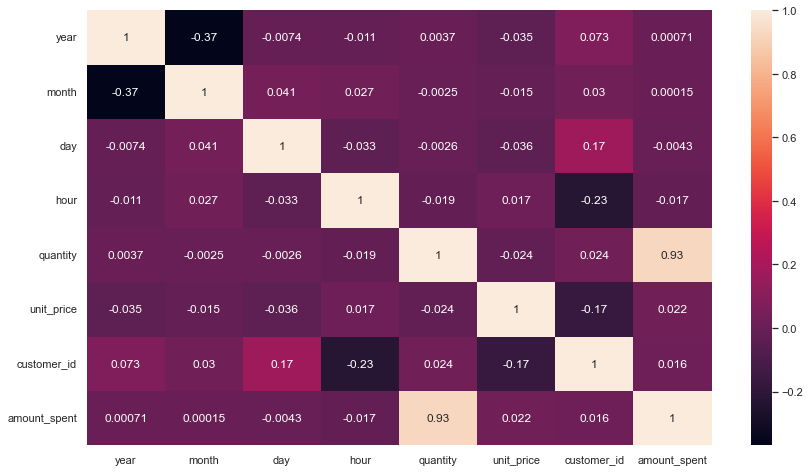

In [56]:
# Correlation
sns.heatmap(df.corr(), annot=True)

**HYPOTHESIS TESTING: KHÁCH HÀNG ĐẶT NHIỀU ĐƠN VÀO MIDDAY HƠN HẲN CÁC PHẦN KHÁC CỦA NGÀY**

Ở phần grouping ta thấy số lượng count của midday chiếm ưu thế, đặt giả thiết kiểm định xem số lượng đơn hàng buổi trưa có phải là cao hơn các phần khác trong ngày hay không để có các chương trình phù hợp với các khoảng thời gian (Ví dụ: quảng cáo sản phẩm mới ở giờ hot, kích cầu ở những buổi ít người mua)

In [57]:
df.groupby('daypart')['invoice_no', 'daypart'].nunique()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_42968/1531727184.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('daypart')['invoice_no', 'daypart'].nunique()


,invoice_no,daypart
daypart,,
morning,4554,1
midday,13592,1
afternoon,2488,1
night,18,1


In [58]:
# 1 - Create column of unique day-month-year
df['day_month_year'] = df['invoice_date'].dt.strftime('%m/%d/%Y')
df.head()

,invoice_no,stock_code,year,month,day,hour,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent,daypart,day_month_year
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,morning,12/01/2010
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,morning,12/01/2010
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,morning,12/01/2010
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,morning,12/01/2010
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,morning,12/01/2010


In [59]:
# 2 - Group invoice_no by day - daypart
date_daypart = df.groupby(['day_month_year','daypart'])['day_month_year', 'daypart', 'invoice_no']
date_daypart.first()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_42968/1920118127.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  date_daypart = df.groupby(['day_month_year','daypart'])['day_month_year', 'daypart', 'invoice_no']


day_month_year    daypart invoice_no
day_month_year daypart                                       
01/04/2011     morning       01/04/2011    morning     539993
               midday        01/04/2011     midday     540011
               afternoon     01/04/2011  afternoon     540099
               night                NaN        NaN        NaN
01/05/2011     morning       01/05/2011    morning     540113
...                                 ...        ...        ...
12/22/2010     night                NaN        NaN        NaN
12/23/2010     morning       12/23/2010    morning     539864
               midday        12/23/2010     midday     539920
               afternoon     12/23/2010  afternoon     539988
               night                NaN        NaN        NaN

[1220 rows x 3 columns]

In [60]:
# 3 - Count unique invoice_no for every daypart of each day = number of orders
orders_by_daypart = date_daypart.agg({'invoice_no':'nunique'})
orders_by_daypart

invoice_no
day_month_year daypart              
01/04/2011     morning             8
               midday             31
               afternoon           1
               night               0
01/05/2011     morning            11
...                              ...
12/22/2010     night               0
12/23/2010     morning             3
               midday             19
               afternoon           5
               night               0

[1220 rows x 1 columns]

In [61]:
# 4 - Convert to a dataframe of numbers of orders
orders_by_daypart = orders_by_daypart.reset_index().rename(columns = {'invoice_no': 'orders_count'})
orders_by_daypart

,day_month_year,daypart,orders_count
0,01/04/2011,morning,8
1,01/04/2011,midday,31
2,01/04/2011,afternoon,1
3,01/04/2011,night,0
4,01/05/2011,morning,11
...,...,...,...
1215,12/22/2010,night,0
1216,12/23/2010,morning,3
1217,12/23/2010,midday,19
1218,12/23/2010,afternoon,5


***testing***

In [62]:
orders_by_daypart[orders_by_daypart['daypart'] == 'morning']

,day_month_year,daypart,orders_count
0,01/04/2011,morning,8
4,01/05/2011,morning,11
8,01/06/2011,morning,8
12,01/07/2011,morning,16
16,01/09/2011,morning,5
...,...,...,...
1200,12/19/2010,morning,1
1204,12/20/2010,morning,12
1208,12/21/2010,morning,10
1212,12/22/2010,morning,2


In [63]:
midday_orders = orders_by_daypart[orders_by_daypart['daypart'] == 'midday']['orders_count']

In [64]:
non_midday_orders = orders_by_daypart[orders_by_daypart['daypart'] != 'midday']['orders_count']

In [65]:
# Unpair or pair?
# Hypothesis (greater): 
#     H0: Mu midday = Mu non_midday
#     Ha: Mu midday > Mu non_midday

from scipy.stats import ttest_ind
ttest_ind(midday_orders, non_midday_orders, alternative="greater")

Ttest_indResult(statistic=49.61453018125108, pvalue=5.390442693505617e-295)

Pvalue <<< 0.05 -> Reject H0

Kết luận: có bằng chứng thống kê cho thấy khách hàng mua nhiều đơn hơn và buổi midday (10-15h, theo Arbitron)

___

**THAM KHẢO:**

https://colab.research.google.com/drive/1y9VmPSGoaQwQ0VSIh573D9zd8LO1j4tm?usp=sharing

https://colab.research.google.com/drive/1kqBv2Ms2IdylxZqhYy6eD-la9yp6EjYI?usp=sharing

https://www.kaggle.com/ludovicocuoghi/uk-e-commerce-dataset-deep-eda

**Phan Lê Anh Thư** | thuleanhphan@gmail.com